In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [14]:
#seaborn.set_palette

Utility functions

- missing_values
- filter_columns
- get_unique_values


In [15]:
def missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """returns DataFrame with count and percentage of NaN values.
        Only returns columns with Nan > 0.
        .
        Input:
            df: DataFrame
        Output:
            nan_df: DataFrame containing count and percentage of NaN values of input DataFrame
    """
    count = df.isnull().sum()
    n = df.shape[0]
    nan_percentage = count / n*100
    nan_df = pd.concat([count,nan_percentage],axis = 1, keys=['Count', '% of null'])
    #return nan_df[nan_df['Count'] > 0]
    return nan_df

def filter_columns(df: pd.DataFrame, excl_dtypes: list, excl_columns: list) -> list:
    """Returns list of columns without pre-specified datatypes and column names
        Inputs:
            df: pandas dataframe
            excl_dtypes:  list of excluded datatypes
            excl_columns: list of excluded columns
        Outputs:
            arr: python list of strings (column names)
    """
    return [col for col in df.columns if df[col].dtype not in excl_dtypes and col not in excl_columns]

def get_unique_values(arr: list, df: pd.DataFrame) -> dict:
    """Returns list of unique values for each column in input list
        Inputs:
            arr: list of columns
            df: dataframe
        Outputs:
            dict: dictionary of column_name:unique_values
    """
    
    d = {}
    for col in arr:
        d[col] =  df[col].nunique(),df[col].unique().tolist()
    return d   

Utility functions for plotting

In [16]:
def annotate_countplot(df: pd.DataFrame, ax: plt.axes,fnt_size=10, xtext_offset=0):
    """Annotates barplot with count and percentages
        Inputs:
            ax: reference to pyplot axes object
            fnt_size: size of annotation font
            xtext_offset: shift xtext
    """
    total = len(df)
    sizes = [0]
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        if height > max(sizes):
            sizes.append(height)
        x, y = p.get_xy()
        count, perc = height, height/len(df)*100
        #ax.annotate('{}  ({:.1%})'.format(count, perc), xy=(x+0.2, y + height ),xytext=(x+xtext_offset, height*1.01),fontsize=fnt_size)
        ax.text(x + width/2.,
                height + 3,
                '{} {} ({:1.2f}%)'.format(count,'\n', perc),
                ha="center", fontsize=fnt_size) 
    ax.set_ylim(0, max(sizes) * 1.15)
    
    
def ploting_cat_fet(df, cols, vis_row=6, vis_col=2):
    
    grid = gridspec.GridSpec(vis_row,vis_col,hspace=0.6) # The grid of chart
    fig = plt.figure(figsize=(25, 40)) # size of figure
    fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
    total=len(df)
    angle = 45
    
    # loop to get column and the count of plots
    for n, col in enumerate(df[cols]): 
        tmp = pd.crosstab(df[col], df['TARGET'], normalize='index') * 100
        tmp = tmp.reset_index()
        tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

        ax = plt.subplot(grid[n]) # feeding the figure of grid
        sns.countplot(x=col, data=df, order=list(tmp[col].values) , color='green') 
        ax.set_ylabel('Count', fontsize=15) # y axis label
        ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
        ax.set_xlabel(f'{col} values', fontsize=15) # x axis label
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        # twinX - to build a second yaxis
        gt = ax.twinx()
        gt = sns.pointplot(x=col, y='Yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
        gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
        gt.set_ylabel("Target %True(1)", fontsize=16)
        sizes=[] # Get highest values in y
        for p in ax.patches: # loop to all objects
            height = p.get_height()
            sizes.append(height)
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center", fontsize=12) 
        ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights


    plt.subplots_adjust(hspace = 0.5, wspace=.3)
    plt.show()

In [17]:
%%time

train = pd.read_csv('../../data/raw/application_train.csv')
test = pd.read_csv('../../data/raw/application_test.csv')

print(f'Train has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'Test has {test.shape[0]} rows and {test.shape[1]} columns')

Train has 307511 rows and 122 columns
Test has 48744 rows and 121 columns
CPU times: user 2.61 s, sys: 187 ms, total: 2.79 s
Wall time: 2.8 s


In [6]:
#Lets set columns display to number of columns, so we can scroll easily(rows too, just in case we wanted to transpose dataframe)
pd.set_option('display.max_columns', train.shape[1])
pd.set_option('display.max_rows', train.shape[1])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
%%time
train_cols = pd.DataFrame(train.dtypes).drop(labels='TARGET').rename(columns={0:'Train'})
test_cols = pd.DataFrame(test.dtypes).rename(columns={0:'Test'})
frames = [train_cols,test_cols]
conc = pd.concat(frames,axis= 1)
conc['is_same'] = (conc.Train==conc.Test)
print(conc['is_same'].value_counts()) 
print()
conc.T

True    121
Name: is_same, dtype: int64

CPU times: user 23.5 ms, sys: 397 µs, total: 23.9 ms
Wall time: 72 ms


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
Train,int64,object,object,object,object,int64,float64,float64,float64,float64,object,object,object,object,object,float64,int64,int64,float64,int64,float64,int64,int64,int64,int64,int64,int64,object,float64,int64,int64,object,int64,int64,int64,int64,int64,int64,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,object,object,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64
Test,int64,object,object,object,object,int64,float64,float64,float64,float64,object,object,object,object,object,float64,int64,int64,float64,int64,float64,int64,int64,int64,int64,int64,int64,object,float64,int64,int64,object,int64,int64,int64,int64,int64,int64,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,object,object,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64
is_same,True,True,True,True,True,True,True,True,Tr

In [9]:
misssing_train = missing_values(train).drop(labels='TARGET').sort_index(axis=0).rename(columns={'Count':'Train count','% of null':'Train %',})
misssing_test = missing_values(test).sort_index(axis=0).rename(columns={'Count':'Test count','% of null':'Test %',})
missing_all = pd.concat([misssing_train,misssing_test],axis=1)
missing_all['abs diff'] = np.abs(missing_all['Train %'] - missing_all['Test %'])
missing_all[(missing_all['Train count'] > 0) | missing_all['Test count'] > 0].sort_values(by='abs diff',ascending=False)

,Train count,Train %,Test count,Test %,abs diff
EXT_SOURCE_1,173378,56.381073,20532,42.122107,14.258965
EXT_SOURCE_3,60965,19.825307,8668,17.782701,2.042606
ENTRANCES_MODE,154828,50.348768,23579,48.373133,1.975635
ENTRANCES_MEDI,154828,50.348768,23579,48.373133,1.975635
ENTRANCES_AVG,154828,50.348768,23579,48.373133,1.975635
FLOORSMAX_MODE,153020,49.760822,23321,47.843837,1.916984
FLOORSMAX_MEDI,153020,49.760822,23321,47.843837,1.916984
FLOORSMAX_AVG,153020,49.760822,23321,47.843837,1.916984
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019,22856,46.889874,1.891146
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019,22856,46.889874,1.891146


In [10]:
dtypes_filter = ['float64','int64']
columns_filter = ['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']
filtered_cols = filter_columns(train, dtypes_filter, columns_filter)
unique_vals = get_unique_values(filtered_cols, train)
for col, val in unique_vals.items():
    print('Column {} has {} distinct values.\n{}'.format(col,val[0],val[1]))
    print('-'*150)

Column NAME_CONTRACT_TYPE has 2 distinct values.
['Cash loans', 'Revolving loans']
------------------------------------------------------------------------------------------------------------------------------------------------------
Column CODE_GENDER has 3 distinct values.
['M', 'F', 'XNA']
------------------------------------------------------------------------------------------------------------------------------------------------------
Column FLAG_OWN_CAR has 2 distinct values.
['N', 'Y']
------------------------------------------------------------------------------------------------------------------------------------------------------
Column FLAG_OWN_REALTY has 2 distinct values.
['Y', 'N']
------------------------------------------------------------------------------------------------------------------------------------------------------
Column NAME_TYPE_SUITE has 7 distinct values.
['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', nan, 'Other_B', 'Group of 

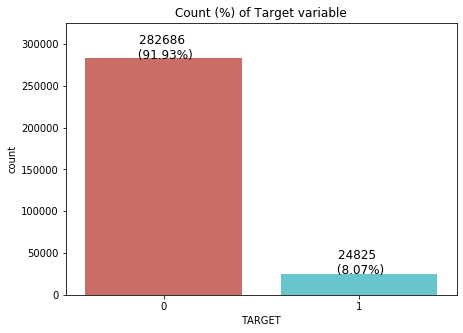

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='TARGET', data=train,palette='hls')
ax.set_title('Count (%) of Target variable')
annotate_countplot(train,ax,12)
plt.show()

In [12]:
%%time
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.drop(['SK_ID_CURR', 'TARGET'],axis=1).describe()

CPU times: user 1.26 s, sys: 46.2 ms, total: 1.3 s
Wall time: 1.37 s


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,307499.000,307233.000,307511.000,307511.000,307511.000,307511.000,307511.000,104582.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307509.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,134133.000,306851.000,246546.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,159080.000,306490.000,306490.000,306490.000,306490.000,307510.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,0.417,168797.919,599026.000,27108.574,538396.207,0.021,-16036.995,63815.046,-4986.120,-2994.202,12.061,1.000,0.820,0.199,0.998,0.281,0.057,2.153,2.052,2.032,12.063,0.015,0.051,0.041,0.078,0.230,0.180,0.502,0.514,0.511,0.117,0.088,0.978,0.752,0.045,0.079,0.150,0.226,0.232,0.066,0.101,0.107,0.009,0.028,0.114,0.088,0.977,0.760,0.043,0.074,0.145,0.222,0.228,0.065,0.106,0.106,0.008,0.027,0.118,0.088,0.978,0.756,0.045,0.078,0.149,0.226,0.232,0.067,0.102,0.109,0.009,0.028,0.103,1.422,0.143,1.405,0.100,-962.859,0.000,0.710,0.000,0.015,0.088,0.000,0.081,0.004,0.000,0.004,0.000,0.004,0.003,0.001,0.010,0.000,0.008,0.001,0.001,0.000,0.006,0.007,0.034,0.267,0.265,1.900
std,0.722,237123.146,402490.777,14493.737,369446.461,0.014,4363.989,141275.767,3522.886,1509.450,11.945,0.002,0.384,0.400,0.043,0.450,0.231,0.911,0.509,0.503,3.266,0.122,0.220,0.197,0.268,0.421,0.384,0.211,0.191,0.195,0.108,0.082,0.059,0.113,0.076,0.135,0.100,0.145,0.161,0.081,0.093,0.111,0.

In [ ]:
%%time
test.drop(['SK_ID_CURR'],axis=1).describe()

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='TARGET', data=train, palette='hls')
ax.set_title('TARGET distribution')
annotate_countplot(train,ax,12)
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax1 = sns.countplot(x='NAME_CONTRACT_TYPE', data=train,ax=ax[0])
ax2 = sns.countplot(x='NAME_CONTRACT_TYPE', data=train,hue='TARGET',ax=ax[1])
ax1.set_title('Count (%) of Loan Type')
annotate_countplot(train,ax1,10)
annotate_countplot(train,ax2,10)

# Binary Features

In [ ]:
train['CODE_GENDER'].value_counts(dropna=False)

In [ ]:
train['FLAG_OWN_CAR'].value_counts(dropna=False)

In [ ]:
train['FLAG_OWN_REALTY'].value_counts(dropna=False)

In [ ]:
train['EMERGENCYSTATE_MODE'].value_counts(dropna=False)

In [18]:
%%time
train['CODE_GENDER'] = 1*(train['CODE_GENDER']=='F')
train['FLAG_OWN_CAR'] = 1*(train['FLAG_OWN_CAR']=='Y')
train['FLAG_OWN_REALTY'] = 1*(train['FLAG_OWN_REALTY']=='Y')
train['EMERGENCYSTATE_MODE'] = 1*(train['EMERGENCYSTATE_MODE']=='Yes')


test['CODE_GENDER'] = 1*(test['CODE_GENDER']=='F')
test['FLAG_OWN_CAR'] = 1*(test['FLAG_OWN_CAR']=='Y')
test['FLAG_OWN_REALTY'] = 1*(test['FLAG_OWN_REALTY']=='Y')
test['EMERGENCYSTATE_MODE'] = 1*(test['EMERGENCYSTATE_MODE']=='Yes')

CPU times: user 153 ms, sys: 60 ms, total: 213 ms
Wall time: 212 ms


In [ ]:
_filter = ['object','float64']
columns_filter = ['SK_ID_CURR','TARGET', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'CNT_CHILDREN',
                 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
binary_cols = filter_columns(train, _filter, columns_filter)
binary = get_unique_values(binary_cols, train)
for col, val in binary.items():
    print('Column {} has {} distinct values.\n{}'.format(col,val[0],val[1]))
    print('-'*150)
    print()

In [ ]:
len(binary_cols)

In [ ]:
%%time
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(7, 5,hspace=0.4) # The grid of chart
plt.figure(figsize=(25,60)) # size of figure

for n, col in enumerate(train[binary_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=train, hue='TARGET', palette='hls') 
    ax.set_ylabel('Count', fontsize=10) 
    ax.set_title(f'{col} Distribution by Target', fontsize=12) 
    ax.set_xlabel(f'{col} values', fontsize=12)
    annotate_countplot(train,ax,10)

# Nominal Features

In [ ]:
list(bin_removed.keys())

In [ ]:
_filter = ['float64']
columns_filter = ['SK_ID_CURR','TARGET', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'CNT_CHILDREN',
                 'ORGANIZATION_TYPE','WEEKDAY_APPR_PROCESS_START']
nominal_cols = filter_columns(train, _filter, columns_filter)
nominal = get_unique_values(nominal_cols, train)
#flags_remo = {k: v for k, v in nominal.items() if not k.startswith('FLAG')}
binary_removed = {k: v for k, v in nominal.items() if 2 < v[0] < 8 }
for col, val in binary_removed.items():
    print('Column {} has {} distinct values.\n{}'.format(col,val[0],val[1]))
    print('-'*150)
    print()

In [ ]:
len(binary_removed)

In [ ]:
ploting_cat_fet(train, list(binary_removed.keys()), vis_row=6, vis_col=2)

# High cardinality

In [ ]:
high_cardinality = {k: v for k, v in nominal.items() if v[0] > 8 }

In [ ]:
ploting_cat_fet(train, list(high_cardinality.keys()), vis_row=4, vis_col=2)

EMERGENCYSTATE_MODE is binary feature

# Dealing with anomalies from EDA 

In [ ]:
fig, ax  = plt.subplots(figsize=(10,8))
sns.distplot(train['DAYS_EMPLOYED']/365)

In [20]:
train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace({365243: np.nan})

test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == 365243
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].replace({365243: np.nan})

In [19]:
def downcast_numeric(df : pd.DataFrame) -> pd.DataFrame:
    """Downcast numeric datatypes to save memory space
        Input: DataFrame
        Output: DataFrame
    """
    
    float_cols = [col for col in df if df[col].dtype == 'float64']
    int_cols = [col for col in df if df[col].dtype == 'int64']
    
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols]   = df[int_cols].astype(np.int32)
    
    return df

In [21]:
train, test = downcast_numeric(train),downcast_numeric(test)

# One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',sparse=True)

In [ ]:
%%time
target = train['TARGET']
train_id = train['SK_ID_CURR']
test_id = test['SK_ID_CURR']
train.drop(['TARGET', 'SK_ID_CURR'], axis=1, inplace=True)
test.drop('SK_ID_CURR', axis=1, inplace=True)

print(train.shape)
print(test.shape)

In [22]:
train = pd.get_dummies(train,drop_first=True)

In [23]:
test = pd.get_dummies(test,drop_first=True)

In [24]:
train.shape,test.shape

((307511, 230), (48744, 227))

extra 2 columns on holdout set

# Imputation of missing values

TBD:
- Multivariate feature imputation
- Nearest neighbors imputation¶

In [27]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(train.drop(['TARGET'],axis=1))

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [29]:
%%time
train_transformed = pd.DataFrame(imp.transform(train.drop(['TARGET'],axis=1)))

CPU times: user 4.31 s, sys: 1.42 s, total: 5.72 s
Wall time: 13.1 s


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [31]:
train_transformed = scaler.fit_transform(train_transformed)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split()

In [35]:
train_transformed.shape

(307511, 229)

In [ ]:
# one hot encoding of train+test crashes pc :(#
#%%time
#traintest = pd.concat([train, test])
#traintest = downcast_numeric(traintest)
#traintest.shape

In [ ]:
#%%time
#traintest = pd.concat([train, test])
#dummies = pd.get_dummies(traintest, columns=traintest.columns, drop_first=True, sparse=True)
#train_ohe = dummies.iloc[:train.shape[0], :]
#test_ohe = dummies.iloc[train.shape[0]:, :]

#print(train_ohe.shape)
#print(test_ohe.shape)

In [ ]:
from pandas.api.types import CategoricalDtype 


In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OneHotEncoder(cols=traintest.columns)

In [ ]:
encoder.fit(traintest)

In [ ]:
%%time
target = train['TARGET']
train_id = train['SK_ID_CURR']
test_id = test['SK_ID_CURR']
train.drop(['TARGET', 'SK_ID_CURR'], axis=1, inplace=True)
test.drop('SK_ID_CURR', axis=1, inplace=True)

print(train.shape)
print(test.shape)